# California Housing Market Analysis: Regression Modeling for Price Prediction
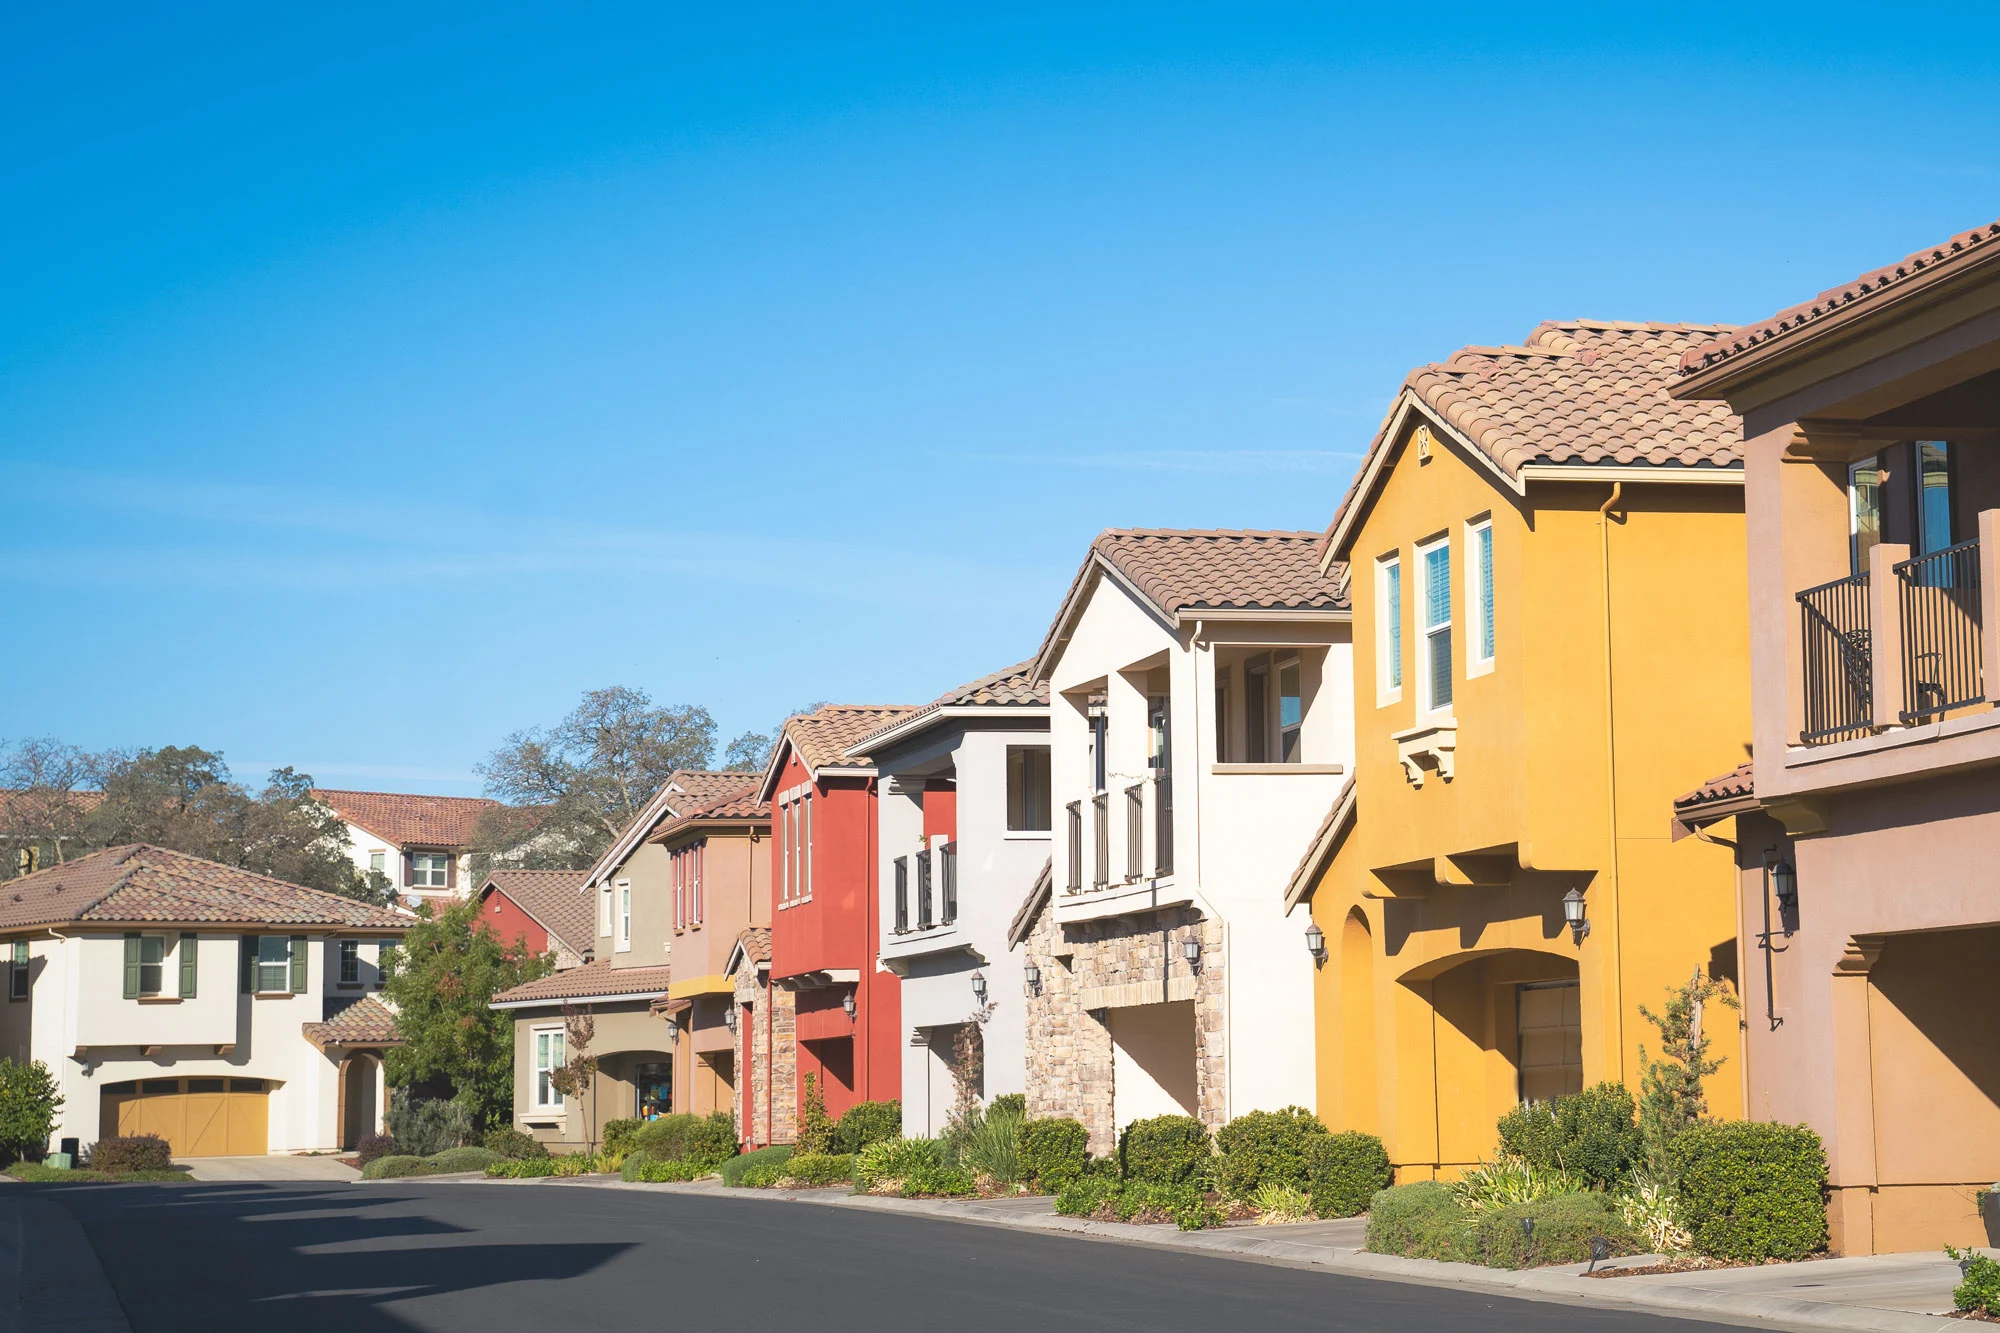
**Author : Meriani Alexandra**

## 1. Introduction
The housing market in California is one of the most dynamic real estate markets in the United States. With its geographical, economic, and social diversity, predicting house prices is a complex yet critical challenge for various stakeholders—from home buyers and investors to policymakers. In this project, we aim to build a machine learning-based predictive model to estimate the **median house value** in different regions of California using various demographic and geographic features.

## 2. Problem Statement 
How can we accurately predict the `median_house_value` of homes in California by utilizing features such as the number of rooms, building age, population density, proximity to the ocean, and household income? The main challenge is to develop a model that can capture the non-linear and complex relationships within the data to provide reliable price estimates.

## 3. Goals 
**Main Goal**: Develop a regression model capable of accurately predicting house prices `median_house_value` in California.

**Additional Objectives**:

- Perform data exploration to understand the distribution and correlation between features.

- Handle missing values & outlier in the data.

- Compare multiple regression models such as Linear Regression, Ridge, Lasso, ElasticNet, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor

- Perform hyperparameter tuning to enhance model performance.

## 4. Analytical Approach 

**Preprocessing**:

- Handle missing values in total_bedrooms, check outlier & duplicate.

- Preprocessing pipeline with one-hot encoding, imputation + Yeo-Johnson normalization, and scaling for numerical features.

**EDA (Exploratory Data Analysis)**:

- Visualize correlations between features and the target variable.

- Analyze data distribution.

**Modeling**:

Compare the performance of several regression models:

    1. Linear Regression
    2. Ridge
    3. Lasso
    4. ElasticNet
    5. KNeighborsRegressor
    6. DecisionTreeRegressor
    7. RandomForestRegressor
    8. GradientBoostingRegressor


- Split the dataset: 80% training, 20% testing.

**Model Evaluation and Tuning**:

- Use techniques like GridSearchCV.

- Apply cross-validation.

## 5. Metric Evaluation 
Since this is a **regression problem**, the evaluation metrics to be used are:

1. **MAE (Mean Absolute Error)**: Measures the average magnitude of the errors in predictions.

2. **RMSE (Root Mean Squared Error)**: Penalizes larger errors more heavily.

3. **R² Score (Coefficient of Determination))**: Indicates how well the model explains the variability in the target variable.

## Data Understanding 
- This dataset contains housing price data from the state of California.
- Each row represents a residential block in California along with various related attributes, such as population, number of rooms, and household income.
- This dataset is commonly used for property price regression studies and demographic analysis.

#### Attributes Information 
|        Attribute      |     Data Type    |                            Description                               |
|:---------------------:|:----------------:|:--------------------------------------------------------------------:|
|   longitude           |   Float          |   Longitude coordinate of the block                                  |
|   latitude            |   Float          |   Latitude coordinate of the block                                   |
|   housing_median_age  |   Float          |   Median age of houses in the block                                  |
|   total_rooms         |   Float          |   Total number of rooms in the block                                 |
|   total_bedrooms      |   Float          |   Total number of bedrooms in the block                              |
|   population          |   Float          |   Total population in the block                                      |
|   households          |   Float          |   Number of households in the block                                  |
|   median_income       |   Float          |   Median income of households in tens of thousands of USD            |
|   median_house_value  |   Float          |   Median house price in USD                                          |
|   ocean_proximity     |   Object         |   Location type in relation to the ocean (e.g., NEAR OCEAN, ISLAND)  |

In [2]:
# Import Library yang dibutuhkan untuk eksplorasi data 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset 
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


## Data Preprocessing - Handle Missing Value & Outliers, Check Duplicate Data

In [5]:
# Cek missing value
pd.DataFrame(df.isna().sum())

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,137
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


<Axes: >

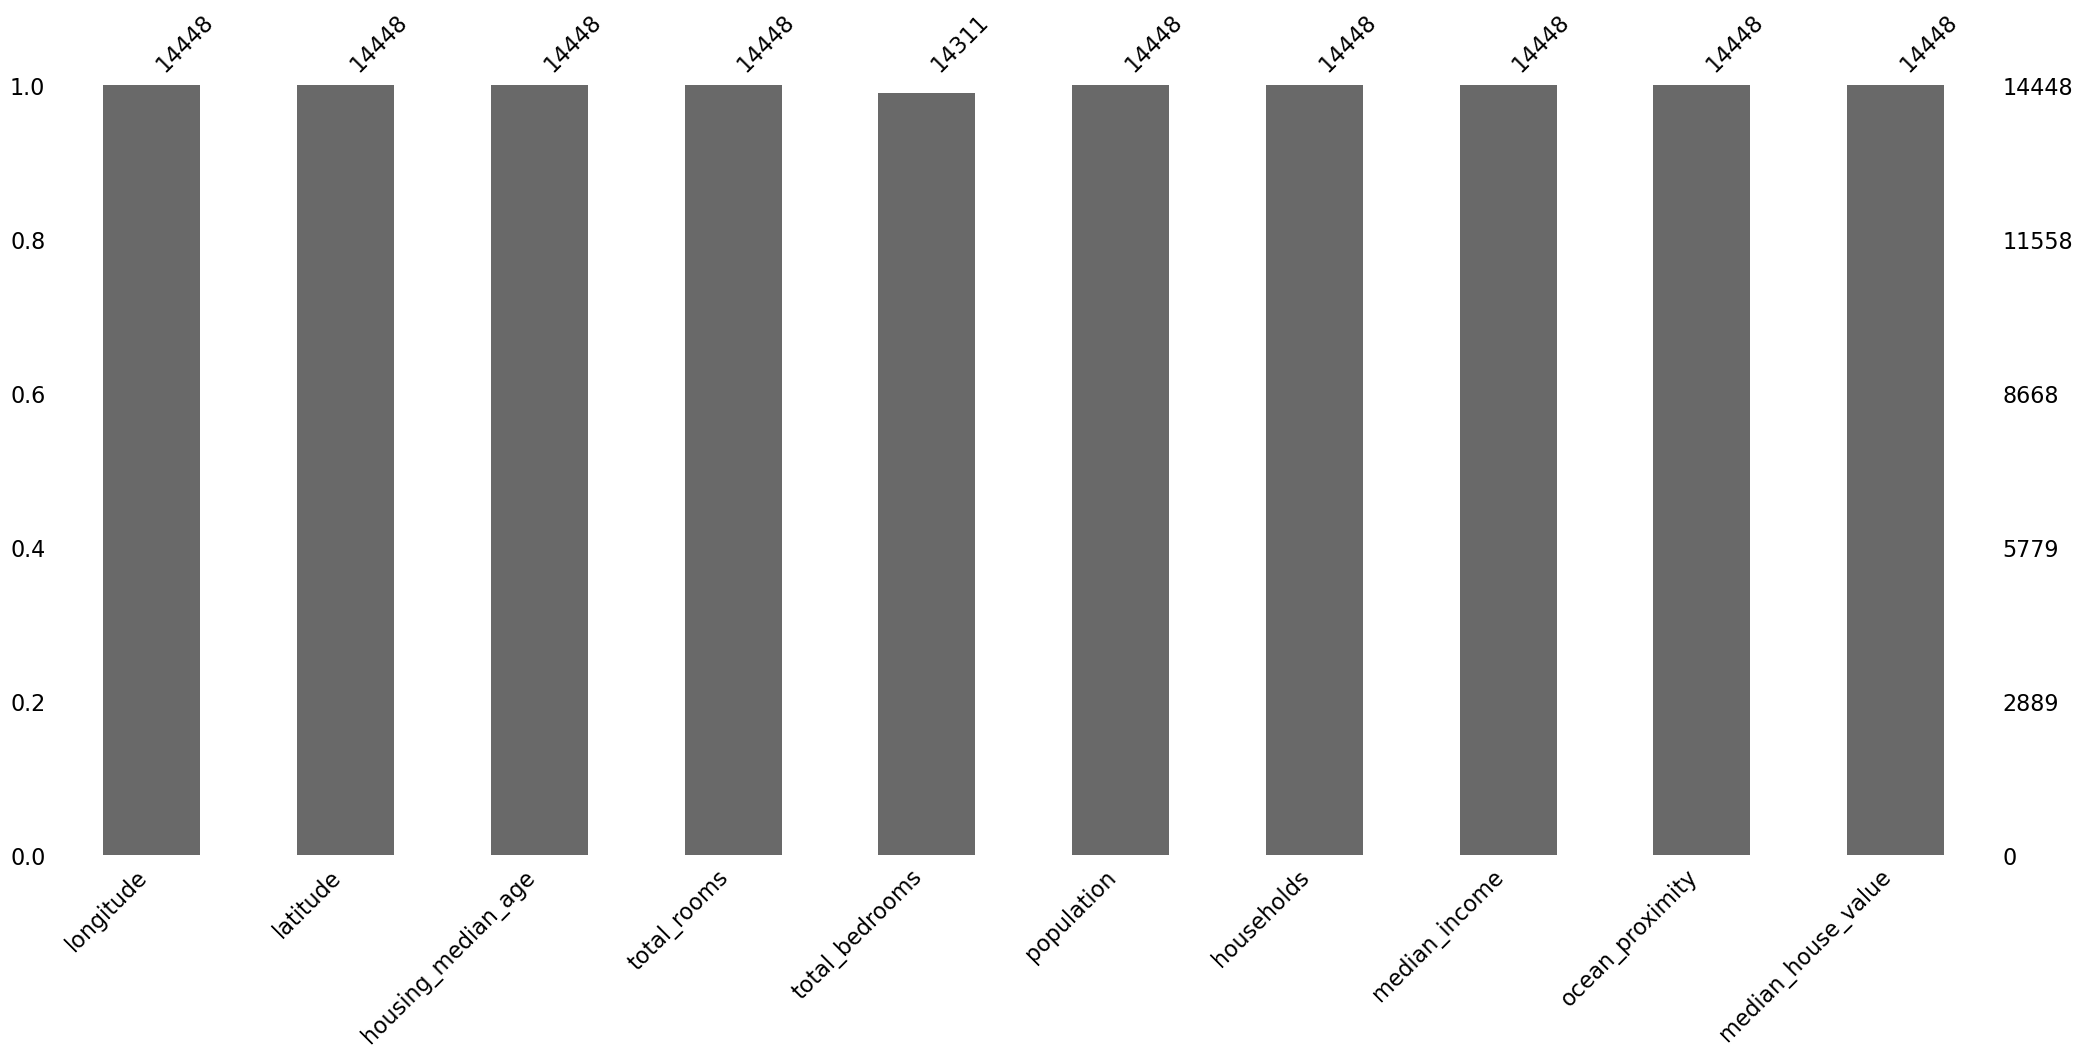

In [6]:
# Missing value dalam bentuk bar
msno.bar(df)

In this case, the `total_bedrooms` column is the only one with missing values — a total of 137 entries are missing. To handle this, the missing values will be filled using the median of the `total_bedrooms` column. Median imputation is preferred in this context because it is more robust to outliers compared to the mean.

In [7]:
# Fill missing values in 'total_bedrooms' with the median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [8]:
#Cek missing value
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

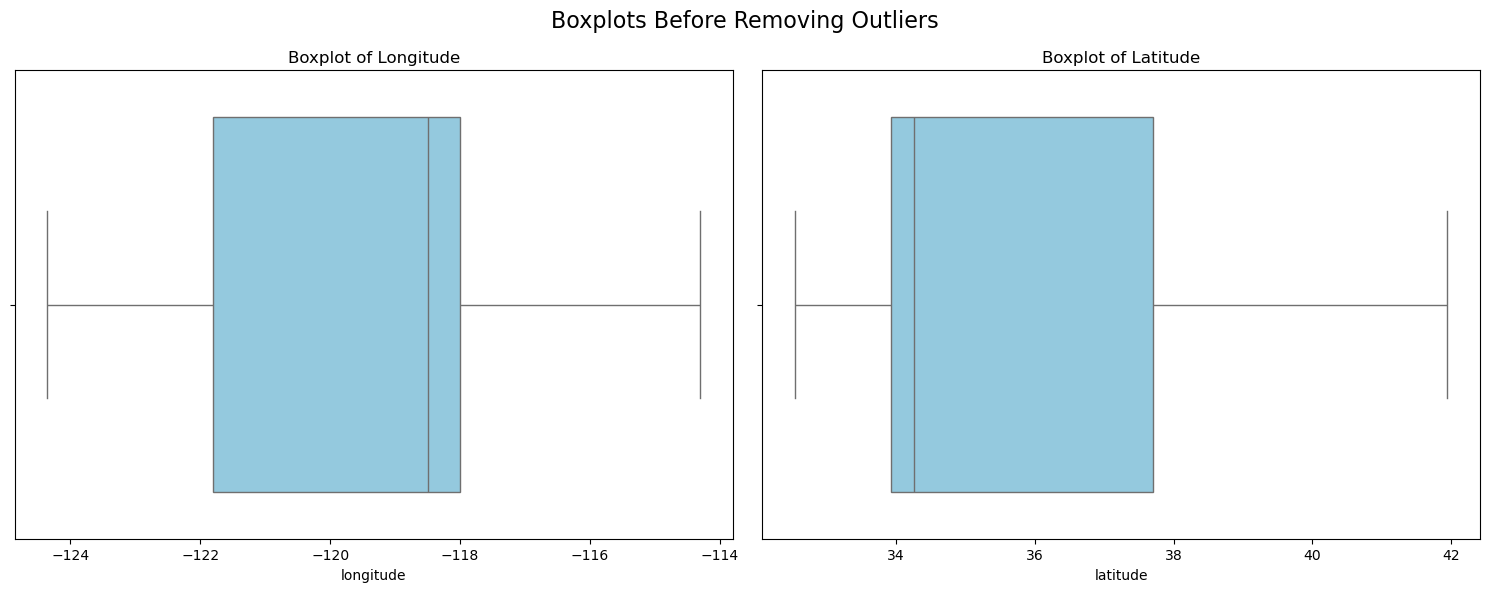

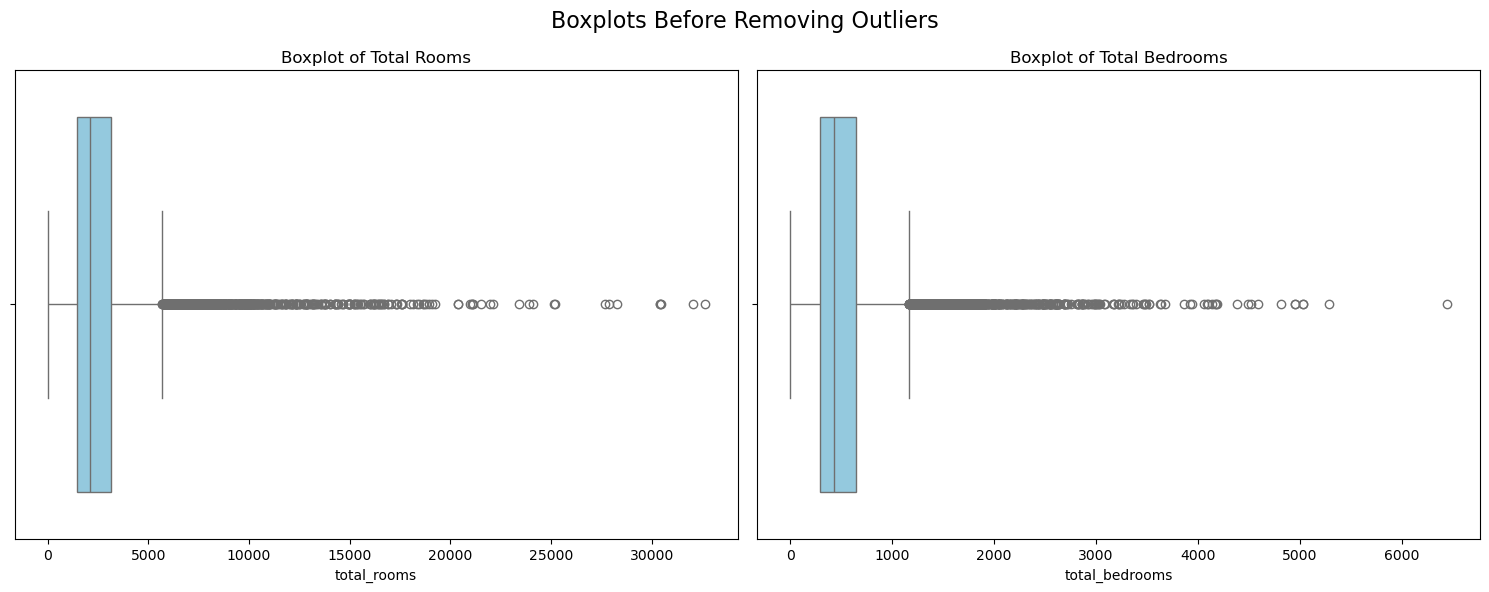

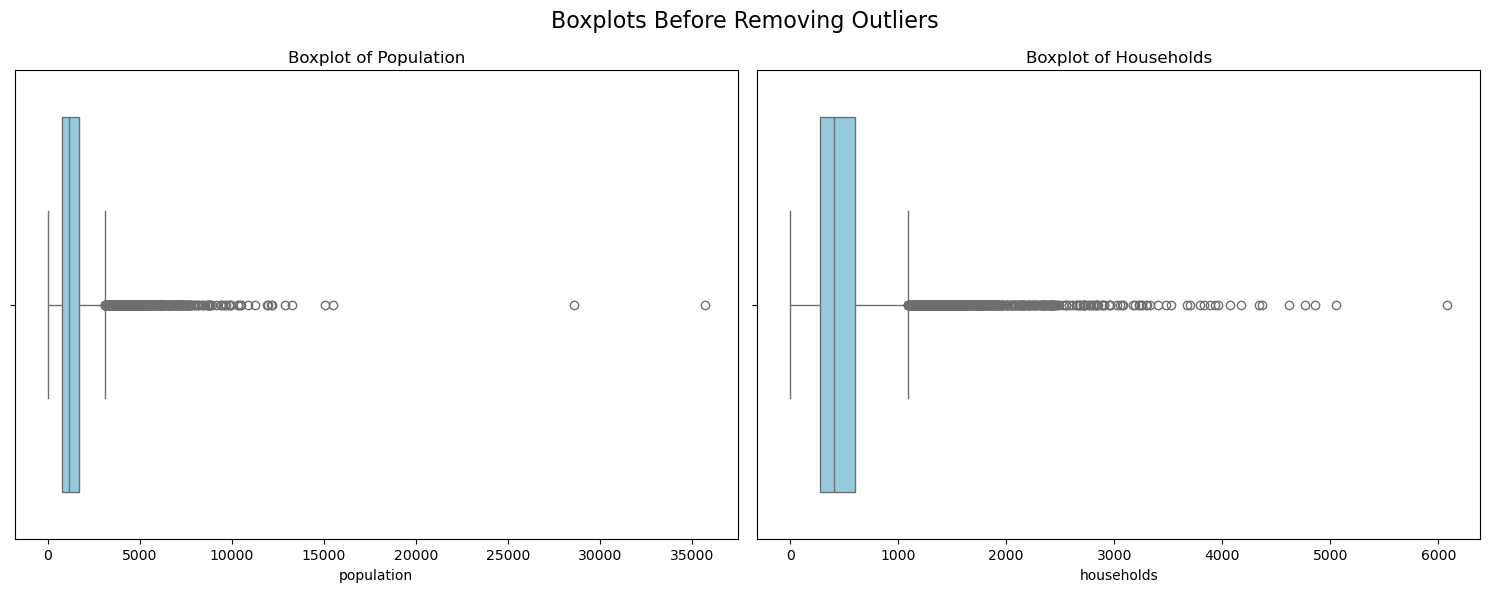

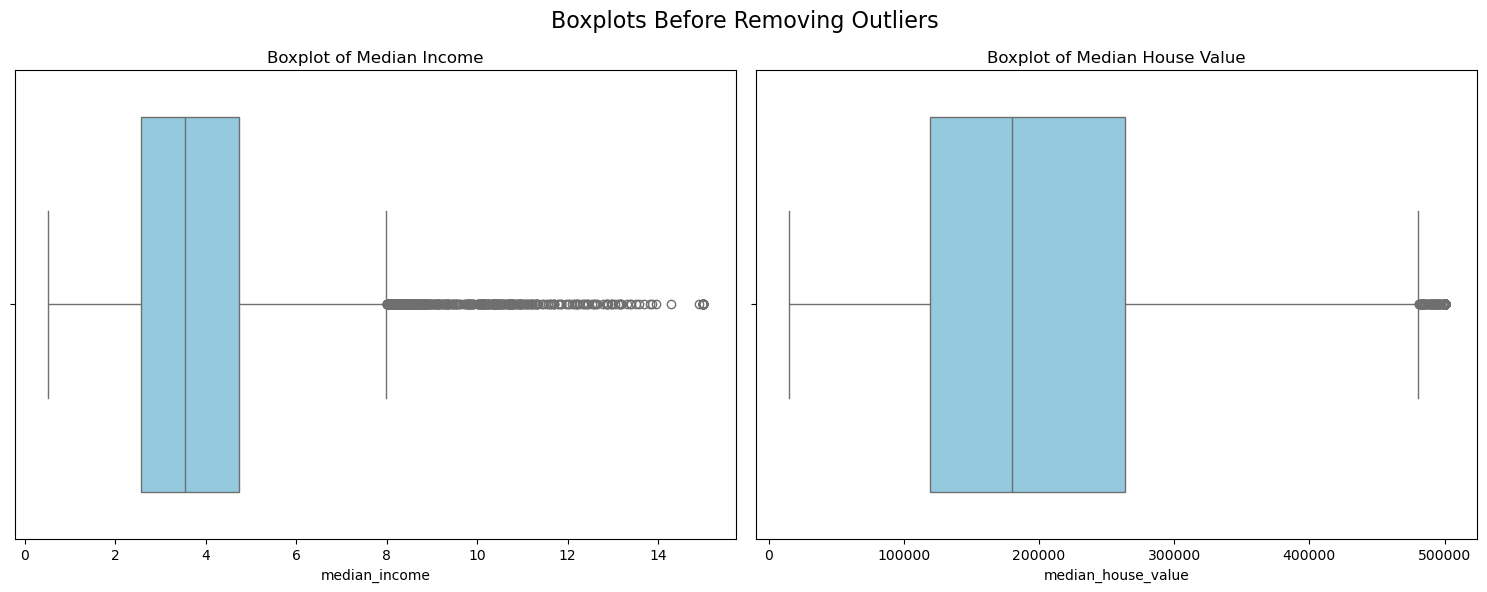

longitude: removed 0 outliers
latitude: removed 0 outliers
total_rooms: removed 900 outliers
total_bedrooms: removed 370 outliers
population: removed 348 outliers
households: removed 115 outliers
median_income: removed 419 outliers
median_house_value: removed 446 outliers


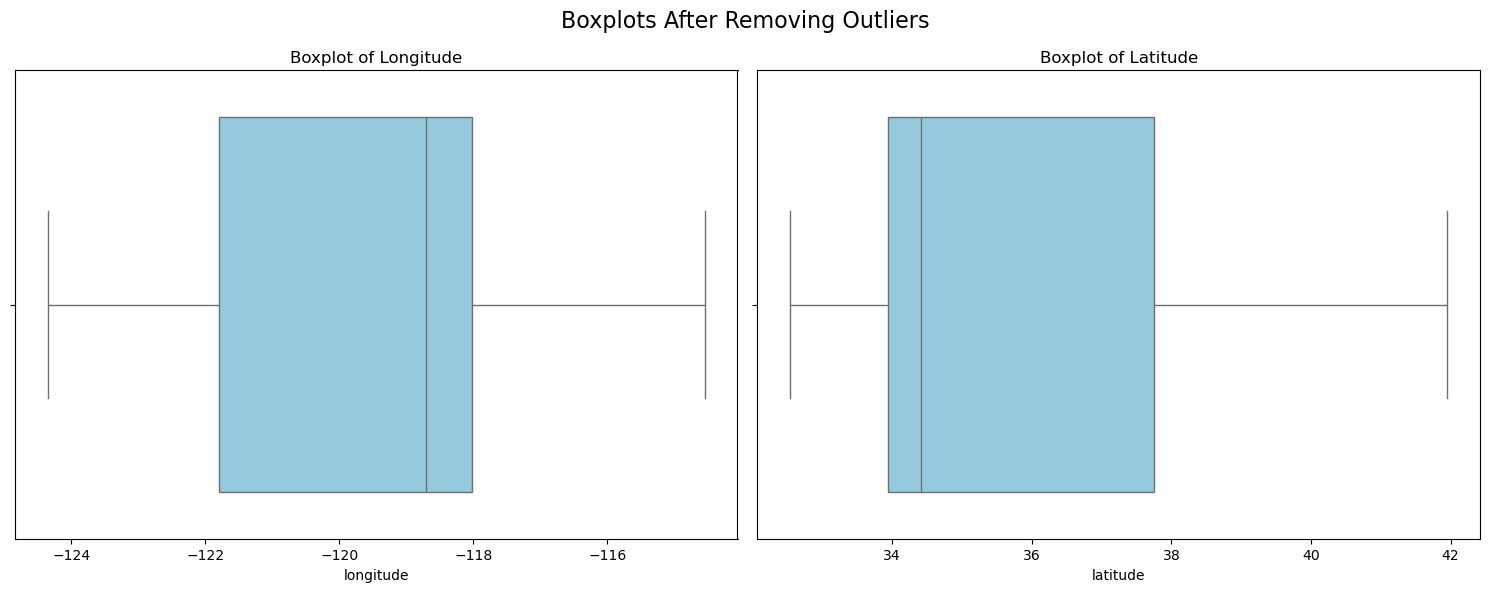

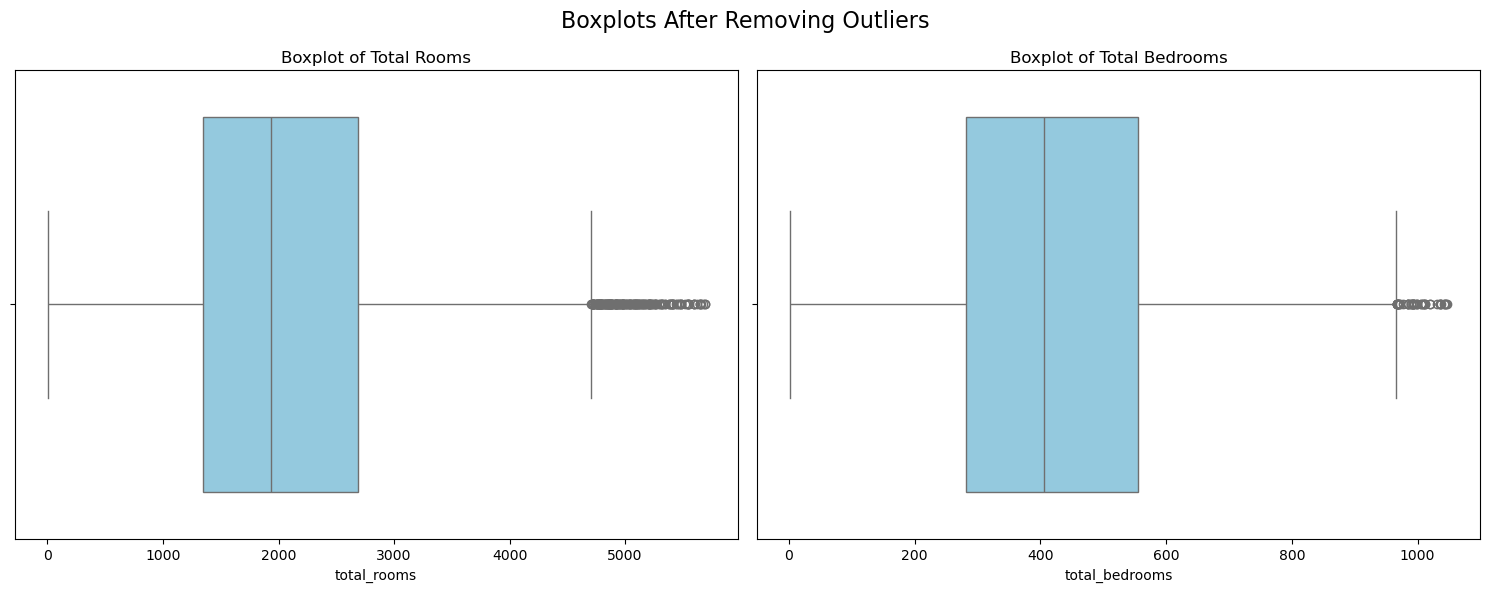

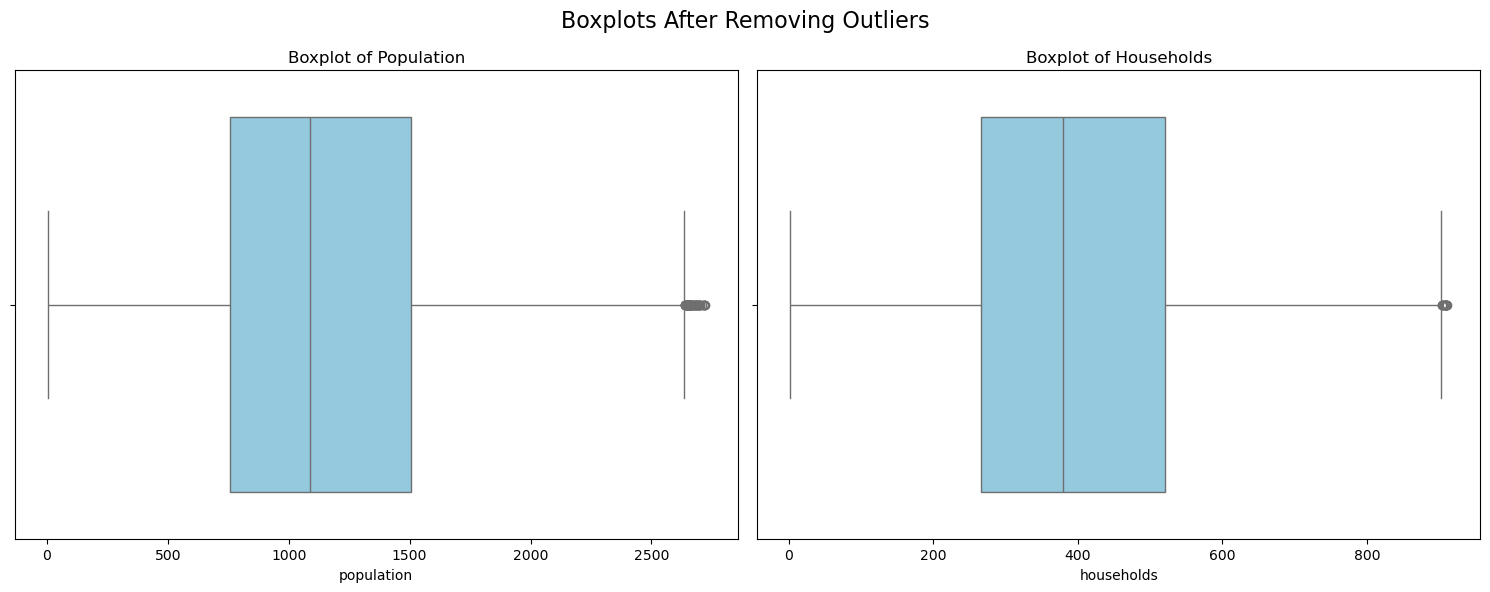

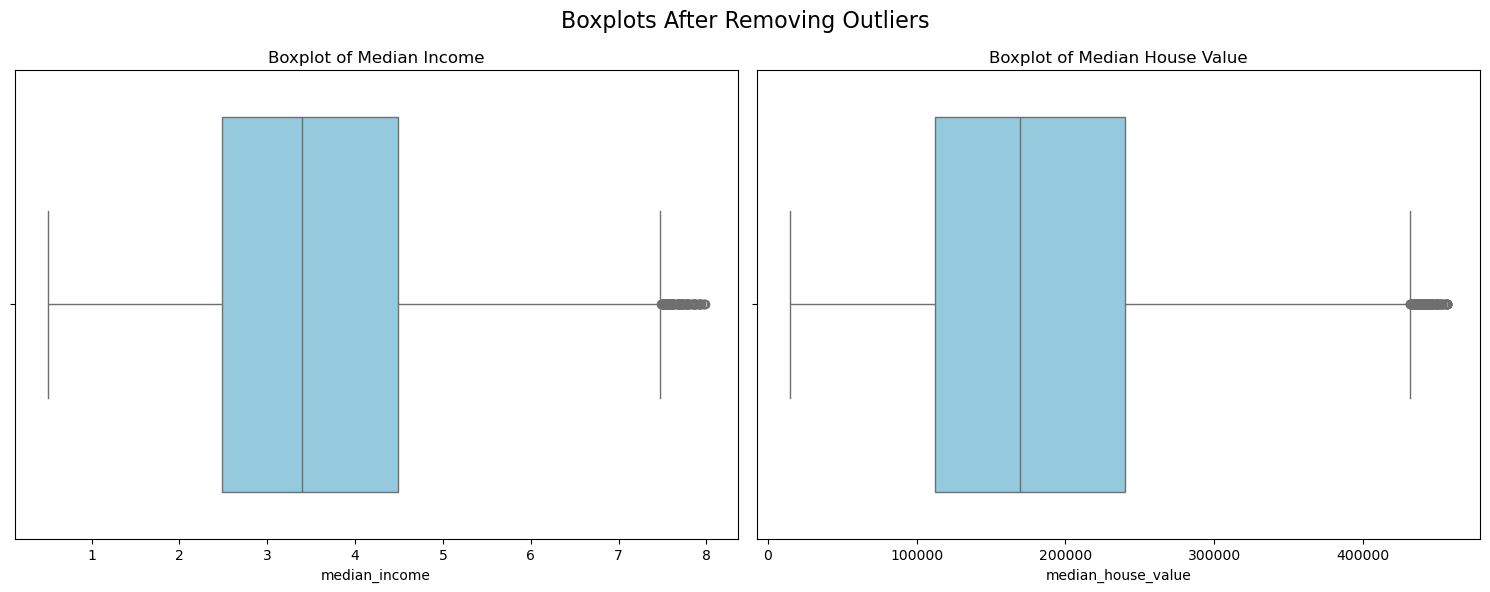

In [9]:
# Cek outlier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dianalisis
num_cols = [
    "longitude", "latitude","total_rooms", "total_bedrooms", "population",
    "households", "median_income", "median_house_value"
]

# ===================== 🔍 1. BOX PLOT SEBELUM =====================
def plot_boxplots(data, title):
    for i in range(0, len(num_cols), 2):
        plt.figure(figsize=(15, 6))
        for j, col in enumerate(num_cols[i:i+2]):
            plt.subplot(1, 2, j+1)
            sns.boxplot(x=data[col], color="skyblue")
            plt.title(f"Boxplot of {col.replace('_', ' ').title()}")
        plt.suptitle(title, fontsize=16)
        plt.tight_layout()
        plt.show()

# Tampilkan boxplot sebelum pembersihan
plot_boxplots(df, "Boxplots Before Removing Outliers")

# ===================== 🧹 2. HAPUS OUTLIER =====================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = df.shape[0]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = df_filtered.shape[0]
    print(f"{column}: removed {before - after} outliers")
    return df_filtered

# Salin dataframe untuk diproses
df_cleaned = df.copy()

# Hapus outlier dari tiap kolom numerik
for col in num_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# ===================== 📊 3. BOX PLOT SESUDAH =====================
plot_boxplots(df_cleaned, "Boxplots After Removing Outliers")

To improve model performance, it is important to remove outliers because they can distort the learning process and lead to biased predictions. By eliminating extreme values that don’t reflect typical observations, the model can generalize better and achieve more reliable results.

In [10]:
print('latitude' in df_cleaned.columns, 'longitude' in df_cleaned.columns)

True True


In [11]:
## Cek duplikat
df_cleaned.duplicated().sum()

0

There are no duplicate entries found in the dataset, so we can proceed to the next step. However, if any duplicates were found, they would be removed to prevent them from affecting the model's performance.

## EDA (Exploratory Data Analysis) - Correlations

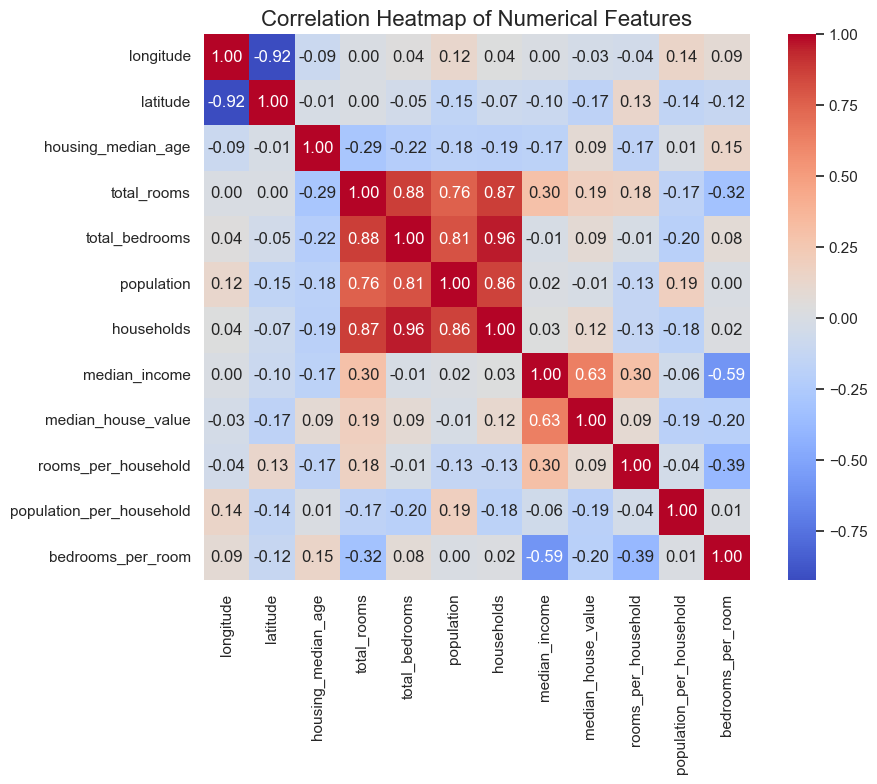

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create ratio-based features
df_cleaned["rooms_per_household"] = df_cleaned["total_rooms"] / df_cleaned["households"]
df_cleaned["population_per_household"] = df_cleaned["population"] / df_cleaned["households"]
df_cleaned["bedrooms_per_room"] = df_cleaned["total_bedrooms"] / df_cleaned["total_rooms"]

# Set seaborn style
sns.set(style="whitegrid")

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Insights:

1. **Strong Positive Correlation**:

`median_income` exhibits a strong positive correlation with `median_house_value` (≈ 0.63). This indicates that areas with higher median incomes generally have higher house values.

2. **Moderate Positive Correlation**:

`rooms_per_household` shows a moderate positive correlation with `median_house_value` (≈ 0.30). This suggests that households with more rooms might correspond to higher property values.

3. **Notable Negative Correlation**:

`bedrooms_per_room` has a significant negative correlation with `median_house_value` (≈ -0.59). A higher proportion of bedrooms to total rooms may be associated with lower house values, potentially indicating smaller or more crowded accommodations.

4. **Latitude and Longitude**:

`latitude` and `longitude` exhibit moderate negative correlations with `median_house_value`, which may reflect geographic effects, such as proximity to desirable locations (e.g., coastlines).

5. **Weak or Low Correlations**:

Features like `total_rooms`, `population`, and `households` show relatively weak correlations with `median_house_value`, implying that these variables might have less direct predictive power unless engineered further (e.g., creating ratios or composite features).

6. **Feature Engineering Impact**:

Ratio-based features like `rooms_per_household` and `bedrooms_per_room` provide added interpretability and stronger correlations compared to their raw counterparts (`total_rooms`, `total_bedrooms`).

## EDA (Exploratory Data Analysis) - Distribution

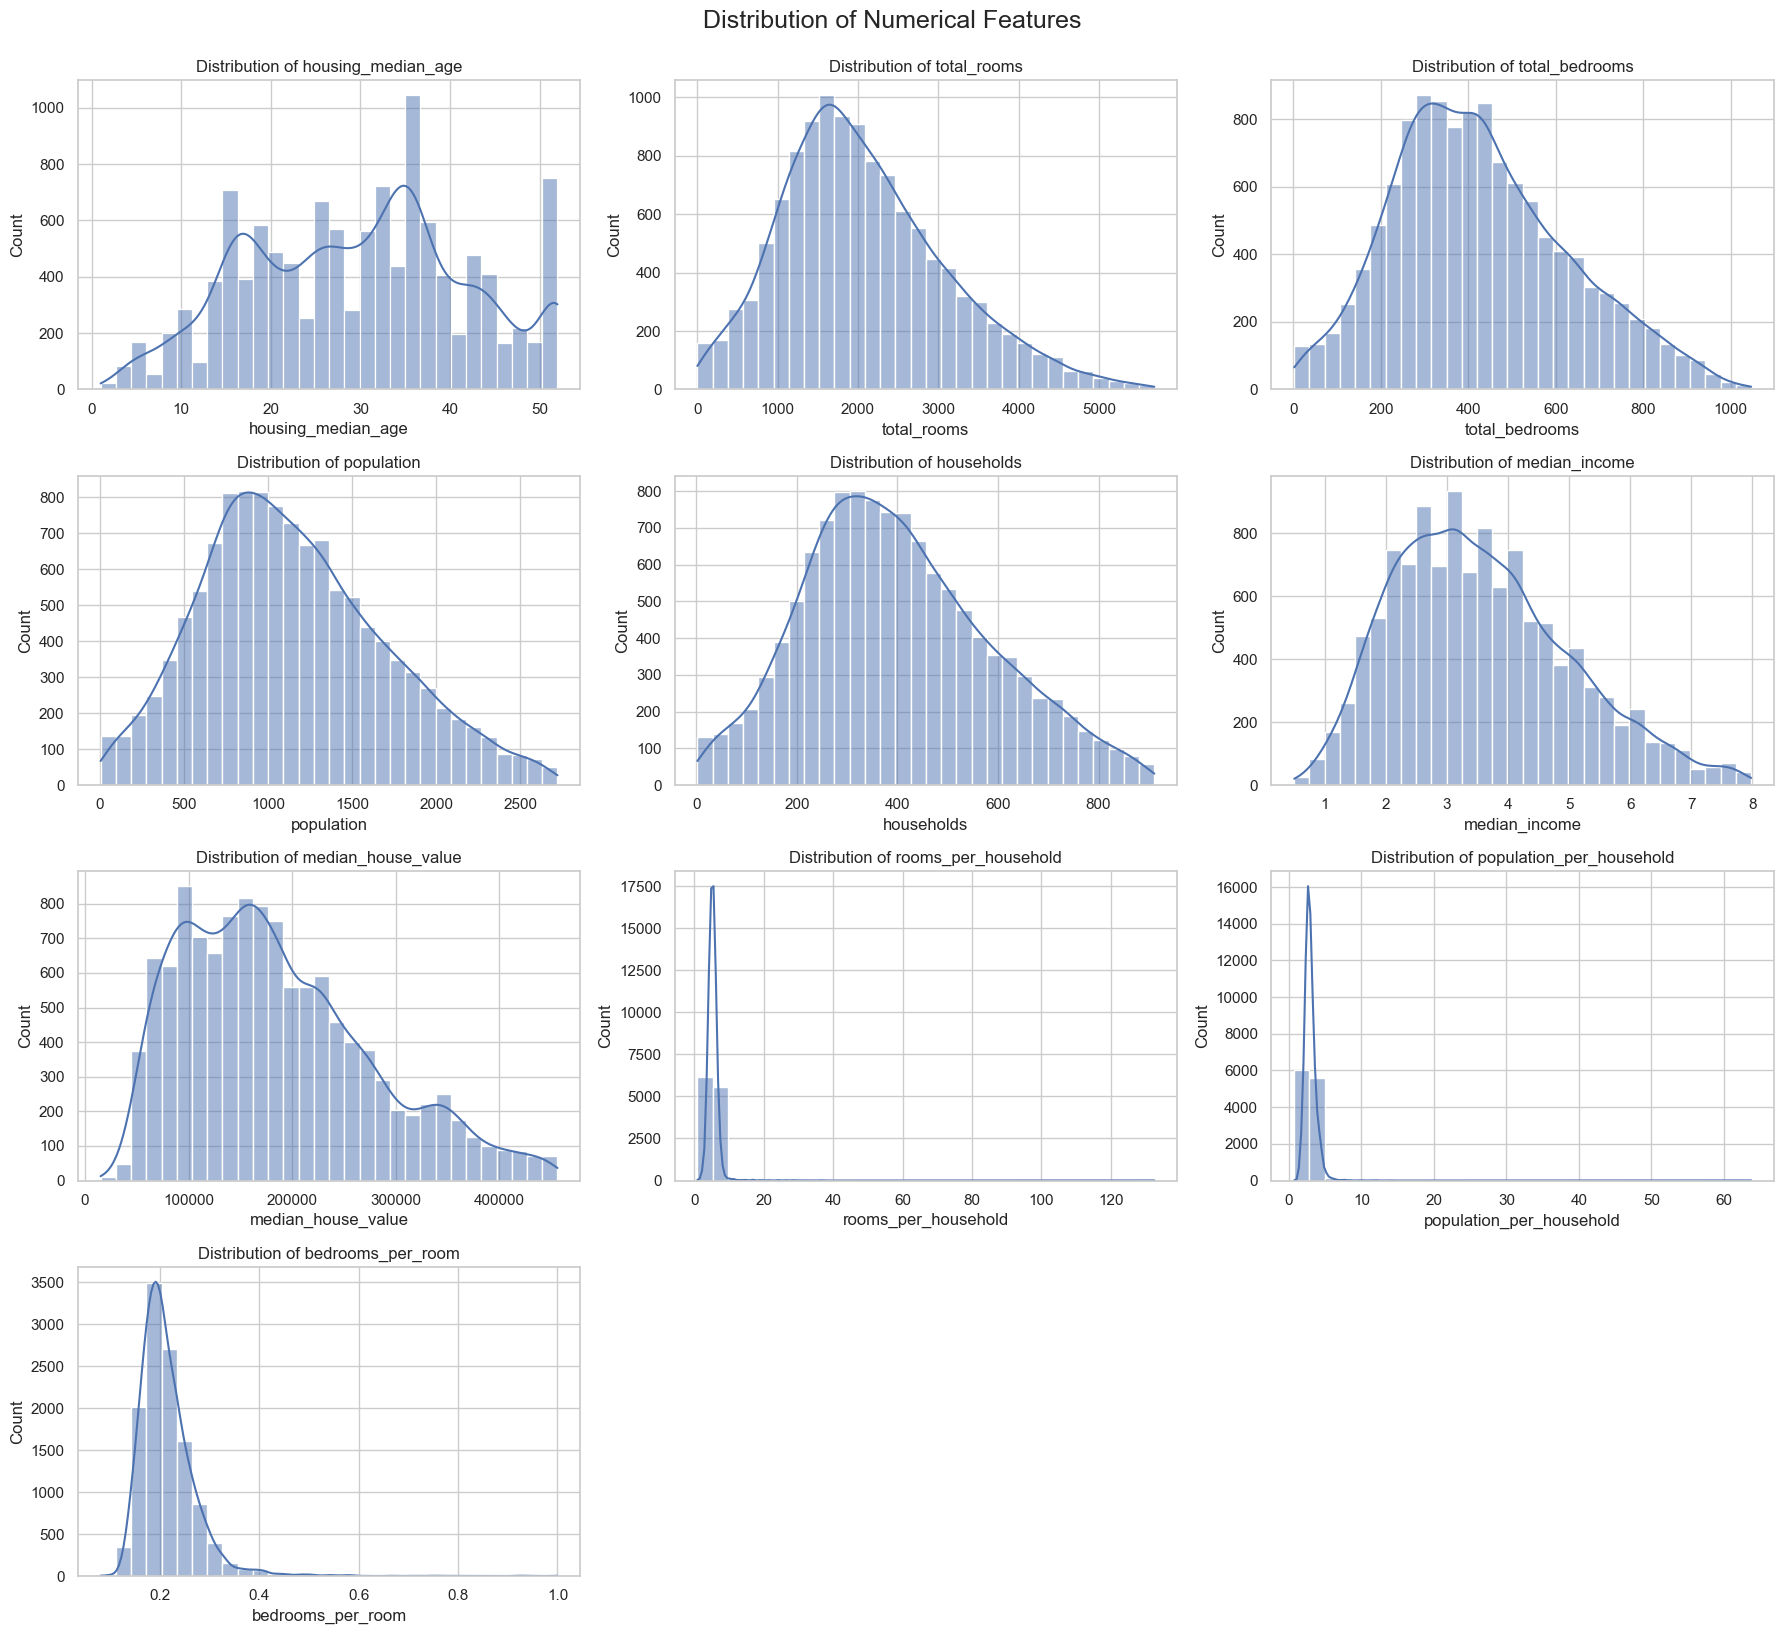

In [13]:
# --- Distribution Plots ---
num_cols = [
    'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'median_house_value',
    'rooms_per_household', 'population_per_household', 'bedrooms_per_room'
]

plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.suptitle("Distribution of Numerical Features", fontsize=18, y=1.02)
plt.show()

### Insights : 
1. **Housing Median Age**:

- The distribution is slightly right-skewed, with a concentration around 20–30 years.
- This suggests most houses are relatively new, with fewer older homes.

2. **Total Rooms & Total Bedrooms**:

- Both features exhibit significant right-skewness, with most values concentrated at the lower end.
- There are some extreme outliers indicating very large houses or buildings.

3. **Population & Households**:

- Both distributions are highly right-skewed, with most neighborhoods having a small number of households and population.
- Outliers indicate neighborhoods with a significantly high population or household count.

4. **Median Income**:

- This feature has a near-normal distribution with a slight right skew.
- Most households have median incomes between 2–7 (scaled data), suggesting a middle-income range.

5. **Median House Value**:

- The distribution peaks in the middle but has a cap at $500,000 due to potential data capping during collection.
- This cap could affect the predictive ability of models.

6. **Rooms Per Household**:

- Most neighborhoods have fewer than 10 rooms per household, with the distribution being heavily right-skewed.
- Some outliers suggest very large homes or housing units.

7. **Population Per Household**:

- The distribution is concentrated below 5 people per household, suggesting smaller household sizes.
- Extreme values represent highly crowded housing conditions.

8. **Bedrooms Per Room**:

- The distribution shows most homes have fewer than 0.2 bedrooms per room.
- This ratio highlights neighborhoods with fewer bedrooms relative to total rooms, possibly indicating higher room diversity.

### Preprocessing pipeline with one-hot encoding, imputation + Yeo-Johnson normalization, and scaling for numerical features

In [14]:
# Check unique categories in the categorical column
print(df_cleaned['ocean_proximity'].unique())
df_cleaned

['INLAND' 'NEAR BAY' '<1H OCEAN' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,2.800000,4.825000,0.250000
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,3.018051,0.322517
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,3.810440,0.167939
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,3.628743,0.251295
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0,6.945035,3.207447,0.162880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,4.742105,3.684211,0.203108
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,3.251142,0.174277
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,3.095694,0.174419
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,1.791349,0.303983


It's important to understand the categories in the ocean_proximity column before transforming it.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

categorical_col = ['ocean_proximity']

# Columns that need imputation & scaling
imp_scale_cols = ['total_bedrooms', 'bedrooms_per_room']

# Columns that only need scaling, including latitude and longitude
scale_col = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'population',
    'households',
    'median_income',
    'rooms_per_household',
    'population_per_household',
    'median_house_value'
]

# Numerical pipeline: imputation + power transform
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler', PowerTransformer(method='yeo-johnson'))
])

# Combined preprocessor
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_col),
    ('imp_scal', numerical_transformer, imp_scale_cols),
    ('scaler', PowerTransformer(method='yeo-johnson'), scale_col)
], remainder='passthrough')  # Keep untouched features

# Pipeline now includes latitude and longitude in scaling


#### Numerical Features Pipeline
1. **IterativeImputer** is used to fill missing values using a multivariate approach. It models each feature with missing values as a function of other features, which often produces more accurate imputations than simple strategies like mean or median.
2. **PowerTransformer** with the `yeo-johnson` method is applied to normalize the distribution of numerical features, making the data more suitable for linear models and reducing the influence of skewed distributions.

#### Combined Preprocessing with ColumnTransformer
1. **OneHotEncoder** transforms the categorical variable into binary dummy variables. Setting `drop='first'` helps avoid the dummy variable trap (multicollinearity).
2. Numerical columns are divided into:
`imp_scale_cols`: require both imputation and scaling.
`scale_col`: require only scaling.
3. `remainder='drop'` ensures only selected columns are passed to the next stage, preventing leakage of unprocessed features.

In [16]:
# Fit and transform the data
X_preprocessed = transformer.fit_transform(df_cleaned)

# Get feature names for categorical columns
onehot_feature_names = transformer.named_transformers_["onehot"].get_feature_names_out(categorical_col)

# Combine numerical and categorical feature names
numeric_features = imp_scale_cols + scale_col
encoded_feature_names = list(onehot_feature_names) + numeric_features

# Create a DataFrame
X_encoded_df = pd.DataFrame(X_preprocessed, columns=encoded_feature_names)

# Remove 'median_house_value' if it exists
if 'median_house_value' in X_encoded_df.columns:
    X_encoded_df = X_encoded_df.drop(columns=["median_house_value"])

# Display the result
X_encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,total_bedrooms,bedrooms_per_room,latitude,longitude,housing_median_age,total_rooms,population,households,median_income,rooms_per_household,population_per_household
0,0.0,1.0,0.0,0.0,0.0,-2.528931,0.861859,0.608266,-4.718448e-16,1.772119,-2.576778,-2.040526,-2.320611,-1.172187,-2.539185,1.981188
1,0.0,0.0,0.0,1.0,0.0,-0.421379,1.759199,0.998669,-3.913536e-15,1.084799,-1.036456,-0.498096,-0.600917,-0.906793,-1.347732,0.265716
2,1.0,0.0,0.0,0.0,0.0,-0.071765,-0.994848,-0.842881,2.386980e-15,-1.031535,0.364118,0.493314,-0.114488,1.686889,0.940560,1.162132
3,0.0,1.0,0.0,0.0,0.0,-1.193543,0.882586,0.608266,-4.996004e-16,1.620817,-1.359407,-0.975221,-1.290892,-0.942703,-0.380146,0.981296
4,0.0,1.0,0.0,0.0,0.0,1.036071,-1.154735,1.298335,-2.636780e-15,-1.031535,1.632285,1.163325,0.886104,1.153953,1.197211,0.507799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0.0,1.0,0.0,0.0,0.0,-1.263878,-0.048943,0.691970,-8.881784e-16,-0.858626,-1.185089,-0.773948,-1.137304,-0.927413,-0.276163,1.037852
11846,0.0,1.0,0.0,0.0,0.0,-0.978113,-0.803735,1.166399,-2.636780e-15,-0.773043,-0.683216,-0.748927,-0.951499,0.667701,0.651494,0.560861
11847,0.0,1.0,0.0,0.0,0.0,-1.187216,-0.799578,0.895701,-2.081668e-15,-0.187652,-0.912326,-0.886232,-1.014670,-0.360764,0.206293,0.367418
11848,0.0,0.0,0.0,0.0,1.0,0.119593,1.573840,0.546862,-3.497203e-15,0.137868,-0.552778,-0.765592,0.039448,-0.144910,-1.383347,-2.006399


## Modeling

In [17]:
# ─── Modeling: Train & Compare 8 Regressors ────────────────────────────────────────

from sklearn.linear_model       import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors          import KNeighborsRegressor
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import mean_squared_error, r2_score
import numpy as np

# 1) Define features X and target y
X = X_encoded_df
y = df_cleaned['median_house_value']

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3) Initialize 8 models
models = {
    'LinearRegression'       : LinearRegression(),
    'Ridge'                  : Ridge(alpha=1.0, random_state=42),
    'Lasso'                  : Lasso(alpha=0.1, random_state=42),
    'ElasticNet'             : ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'KNeighborsRegressor'    : KNeighborsRegressor(n_neighbors=5),
    'DecisionTreeRegressor'  : DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor'  : RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# 4) Fit each model, predict, and compute metrics
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Updated RMSE calculation
    r2   = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Test RMSE': rmse,
        'Test R²': r2
    })

# 5) Summarize
results_df = pd.DataFrame(results).sort_values('Test RMSE')
results_df

,Model,Test RMSE,Test R²
6,RandomForestRegressor,44610.077614,0.769221
7,GradientBoostingRegressor,47817.060060,0.734847
4,KNeighborsRegressor,53198.225785,0.671810
5,DecisionTreeRegressor,58839.882550,0.598510
1,Ridge,59902.458483,0.583878
2,Lasso,59904.835356,0.583845
0,LinearRegression,59904.937833,0.583844
3,ElasticNet,59929.018887,0.583509


In [18]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates a regression model on training and test data.
    Returns a dictionary of scores (RMSE, MAE, R²).
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics for test set
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Metrics for training set (to check for overfitting)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    return {
        'Train RMSE': rmse_train,
        'Test RMSE': rmse_test,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
        'Train R²': r2_train,
        'Test R²': r2_test
    }

models = {
    'LinearRegression'       : LinearRegression(),
    'Ridge'                  : Ridge(alpha=1.0, random_state=42),
    'Lasso'                  : Lasso(alpha=0.1, random_state=42),
    'ElasticNet'             : ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    'KNeighborsRegressor'    : KNeighborsRegressor(n_neighbors=5),
    'DecisionTreeRegressor'  : DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor'  : RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate all models and store results
scoring_results = []
for name, model in models.items():
    scores = evaluate_model(model, X_train, X_test, y_train, y_test)
    scores['Model'] = name  # Add model name
    scoring_results.append(scores)

# Convert to a DataFrame for easier analysis
results_df = pd.DataFrame(scoring_results).sort_values('Test RMSE')
results_df = results_df[['Model'] + [col for col in results_df.columns if col != 'Model']]
results_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
6,RandomForestRegressor,16386.981358,44610.077614,11097.703707,30230.313059,0.967927,0.769221
7,GradientBoostingRegressor,44029.070948,47817.060060,31600.018439,33795.002960,0.768465,0.734847
4,KNeighborsRegressor,44321.978049,53198.225785,31253.514810,37670.498650,0.765374,0.671810
5,DecisionTreeRegressor,0.000000,58839.882550,0.000000,39713.334177,1.000000,0.598510
1,Ridge,58396.876750,59902.458483,43911.137648,44550.376648,0.592698,0.583878
2,Lasso,58392.785190,59904.835356,43908.191943,44550.511951,0.592755,0.583845
0,LinearRegression,58392.784723,59904.937833,43908.141638,44550.570923,0.592755,0.583844
3,ElasticNet,58847.002019,59929.018887,44341.628944,44587.003455,0.586394,0.583509


### Insights : 
1. **Best Performing Model**

- RandomForestRegressor shows the best performance:

    - Train RMSE: 16,386.98
    - Test RMSE: 44,610.08
    - Train MAE: 11,097.70
    - Test MAE: 30,230.31
    - Train R²: 0.9679 (indicating the model explains 96.79% of the variance in the training data).
    - Test R²: 0.7692 (indicating the model explains 76.92% of the variance in the test data).

- Insight: RandomForestRegressor is the best model overall, achieving the lowest Test RMSE and highest Test R². However, the relatively large gap between Train RMSE and Test RMSE suggests slight overfitting.

2. **Second Best Model**

- GradientBoostingRegressor performs next best:

    - Train RMSE: 44,029.07
    - Test RMSE: 47,817.06
    - Train MAE: 31,600.02
    - Test MAE: 33,795.00
    - Train R²: 0.7685
    - Test R²: 0.7348

- Insight: GradientBoostingRegressor is competitive, offering robust performance on the test set, with less overfitting compared to RandomForest.

3. **Worst Performing Model**

- DecisionTreeRegressor is the worst performing:

    - Train RMSE: 0.0 (indicating perfect fit to training data, overfitting).
    - Test RMSE: 58,839.88
    - Train R²: 1.0 (overfitting indicator).
    - Test R²: 0.5985 (poor generalization on the test set).
      
- Insight: DecisionTreeRegressor suffers from severe overfitting, leading to poor generalization.

4. **Other Models**

- KNeighborsRegressor:
    - Train/Test RMSE: 44,321.98 / 53,198.23
    - Train/Test MAE: 31,253.51 / 37,670.50
    - Test R²: 0.6718
- Insight: KNeighborsRegressor performs moderately well but falls behind GradientBoosting and RandomForest in accuracy.

5. **Linear Models (Ridge, Lasso, LinearRegression, ElasticNet)**:

- All linear models show nearly identical performance:

    - Test RMSE: ~59,000
    - Test R²: ~0.5835

- Insight: Linear models struggle to capture the non-linear relationships in the data, indicating the need for more complex models.

In [19]:
# Hyperparameter Tuning 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np

# 1) Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2) Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# 3) Define the scoring metric
def rmse_metric(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Use a scorer that works with GridSearchCV
scorer = make_scorer(rmse_metric, greater_is_better=False)

# 4) Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# 5) Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(rmse_metric, greater_is_better=False, response_method='predict'),
             verbose=2)

In [20]:
# 6) Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Recalculate metrics
train_rmse = rmse_metric(y_train, y_pred_train)
test_rmse = rmse_metric(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [21]:
# 7) Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train RMSE: 16240.92
Test RMSE: 44487.33
Train MAE: 11024.12
Test MAE: 30121.39
Train R²: 0.9685
Test R²: 0.7705


### Insights:

1. **Best Parameters**:

- After hyperparameter tuning, the best parameters for the model are:

    - max_depth: 30
    - min_samples_leaf: 1
    - min_samples_split: 2
    - n_estimators: 200

2. **Model Performance**:

- Training Metrics:
  
  - RMSE: 16,240.92
  - MAE: 11,024.12
  - R²: 0.9685 (indicating the model explains 96.85% of the variance in the training data).

3. **Testing Metrics**:

- RMSE: 44,487.33
- MAE: 30,121.39
- R²: 0.7705 (indicating the model explains 77.05% of the variance in the test data).

4. **Insights into the Model**:

- Overfitting Analysis:

    - The gap between Train RMSE (16,240.92) and Test RMSE (44,487.33) indicates that the model may slightly overfit the training data.

- Error Analysis:

    - The Test MAE (30,121.39) shows the average absolute error, suggesting that predictions are, on average, off by around 30,121.39.

- Model Suitability:

    - An R² of 0.7705 on the test data demonstrates that the model performs well, though there might still be room for improvement in generalization.

                       Feature  Importance
13               median_income    0.483643
1       ocean_proximity_INLAND    0.209400
15    population_per_household    0.106952
8                    longitude    0.080322
7                     latitude    0.055096
9           housing_median_age    0.023123
14         rooms_per_household    0.011590
3     ocean_proximity_NEAR BAY    0.008200
6            bedrooms_per_room    0.007110
4   ocean_proximity_NEAR OCEAN    0.004678
5               total_bedrooms    0.003638
11                  population    0.002439
12                  households    0.001672
10                 total_rooms    0.001264
0    ocean_proximity_<1H OCEAN    0.000873
2       ocean_proximity_ISLAND    0.000000


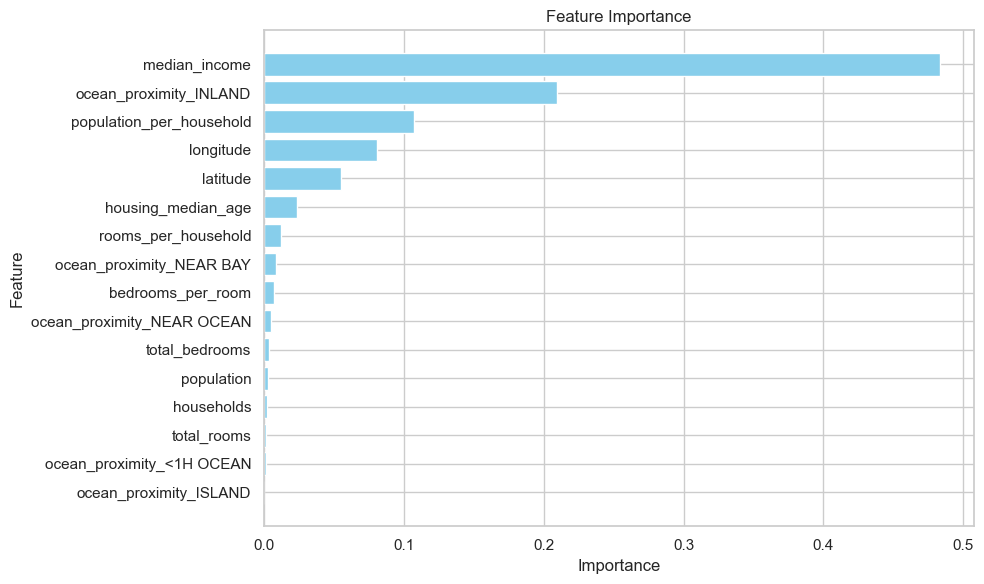

In [22]:
## Feature Importance 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance values
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with named columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance on top
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Insights :
1. **Most Important Feature**:

- `median_income` is by far the most influential feature in predicting the target variable, with an importance score of 0.4836.
- This suggests that income level significantly impacts the outcome, making it a critical variable for predictions.

2. **Geographical Influence**:

- `ocean_proximity_INLAND` (importance: 0.2094) and `longitude` (importance: 0.0803) indicate that proximity to certain locations and geographical coordinates play a notable role.

- These features likely capture spatial relationships tied to the target variable.

3. **Household Characteristics**:

- `population_per_household` (importance: 0.1069) highlights the significance of household composition in the prediction model.
- Other housing-related features such as `housing_median_age` (0.0231) and `rooms_per_household` (0.0116) have smaller, yet non-negligible impacts.

4. **Lesser Important Features**:

- Features like `ocean_proximity_NEAR BAY` (0.0082) and `bedrooms_per_room` (0.0071) have low importance scores, implying they contribute less to the model’s predictions.
- Features such as ocean_proximity_ISLAND and ocean_proximity_<1H OCEAN are either negligible or have no impact.

5. **Geographical Context**:

- Features related to proximity categories (e.g., `ocean_proximity_`) show varying levels of importance, indicating the model captures location-based trends but prioritizes inland areas more than proximity to water bodies.

## Conclusion and Recommendation
#### Conclusion 
From the analysis conducted, **RandomForestRegressor** proved to be the best model with consistent performance on both training and test data. This model recorded a **Train RMSE** of 16,240.92 and a **Test RMSE** of 44,487.33, along with a **Train R²** of 0.9685 and a **Test R²** of 0.7705. This indicates the model's ability to capture complex relationships in the data with high accuracy. Based on the feature importance analysis, the `median_income` feature had the most significant influence on predictions, followed by `ocean_proximity_INLAND` and `population_per_household`, highlighting the importance of economic characteristics and geographic location in determining the target value. The **GradientBoostingRegressor** model emerged as the second-best alternative, although its performance was slightly below that of RandomForest. On the other hand, linear models such as Ridge and Lasso showed lower performance, indicating that the relationship between features and the target is non-linear. Overall, this analysis underscores the importance of selecting a model capable of capturing non-linear relationships and considering the contribution of each feature to produce accurate predictions.

#### Recommendation
1. **Optimize Strategy Based on Median Income (median_income)**

- The `median_income` feature has the highest influence on predictions. In the real estate business context, this indicates that areas with higher median income tend to have higher property values.

- Recommendations:

    - Focus marketing efforts on areas with high median income to maximize sales opportunities.
    - Consider developing premium properties in regions where median income is significantly increasing.

2.**Strategic Area Mapping**

- Geographic locations like ocean_proximity_INLAND and longitude also play a significant role. This suggests that properties in certain locations have a higher appeal compared to other areas.

- Recommendations:

    - Conduct spatial analysis to identify areas with high potential for property value growth.
    - Use these insights for strategic planning, such as business expansion or marketing resource allocation.

3.**Enhance Model for Better Performance**

- RandomForestRegressor has proven to be the best model for predicting property values. However, there is room for improvement.

- Recommendations:

    - Perform further hyperparameter tuning, particularly on min_samples_split and min_samples_leaf, to improve model generalization and reduce overfitting risks.
    - Explore other ensemble models like XGBoost or stacking combinations to compare performance.

4.**Incorporate Additional Data**

- The current dataset is robust, but adding more variables could enhance the model’s predictions, such as:
  - Accessibility to public facilities (schools, hospitals, public transportation).
  - Trends in infrastructure development in certain areas.

- Recommendations:
  - Integrate external data to provide additional value to the model's predictions.

5. **Real-World Implementation**

- This model can be used to provide competitive property pricing recommendations based on location and other characteristics.

- Recommendations:

    - Develop an interactive dashboard to visualize price predictions based on user inputs (e.g., location, number of rooms).
    - Use model insights to offer property investment recommendations to clients or developers.

6. **Diversify Property Products**

- Based on significant features like population_per_household, developers can consider household needs in specific areas.

- Recommendations:

    - Offer property types that match household sizes and needs, such as small apartments for densely populated areas or larger family homes for suburban areas.

In [23]:
# Save the best model after GridSearchCV
import pickle

best_rf_model = grid_search.best_estimator_
pickle.dump(best_rf_model, open('Best_RF_Model.sav', 'wb'))


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  22.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  19.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  19.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   9.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  18.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_es

In [24]:
# Save the best model after GridSearchCV
import pickle

best_rf_model = grid_search.best_estimator_
pickle.dump(best_rf_model, open('Best_RF_Model.pkl', 'wb'))
print("Model terbaik telah disimpan sebagai 'Best_RF_Model.pkl'")

Model terbaik telah disimpan sebagai 'Best_RF_Model.pkl'


## Thank you!